<a href="https://colab.research.google.com/github/Parishri07/Unsupervised-Learning/blob/main/KMeans_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
X,y=make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)

In [ ]:
X.shape

(1000, 2)

In [ ]:
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

In [ ]:
df = pd.DataFrame(X)

In [ ]:
df

,0,1
0,-6.596339,-7.139015
1,-6.137532,-6.580817
2,5.198206,2.049175
3,-2.968559,8.164442
4,-2.768789,7.511143
...,...,...
995,-4.818124,-5.671743
996,-1.885078,9.642632
997,3.690480,4.605552
998,4.030367,1.786198


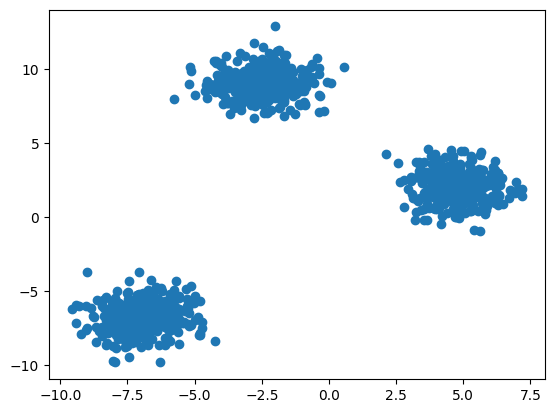

In [ ]:
plt.scatter(X[:,0], X[:,1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.cluster import KMeans

Manual Process

Elbow method to select the K value

In [ ]:
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[66571.67201089079,
 18773.018255690862,
 1950.8814994726636,
 1713.3119897862944,
 1486.5832249982923,
 1278.446319377062,
 1132.794282758853,
 999.1334716432714,
 866.422724472776,
 798.4921889994052]

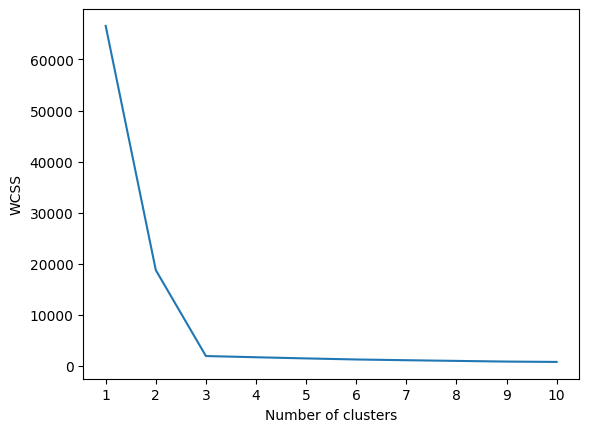

In [ ]:
## plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# select k value as 3

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++')
y_labels = kmeans.fit_predict(X_train)

## fit-predict only for training data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


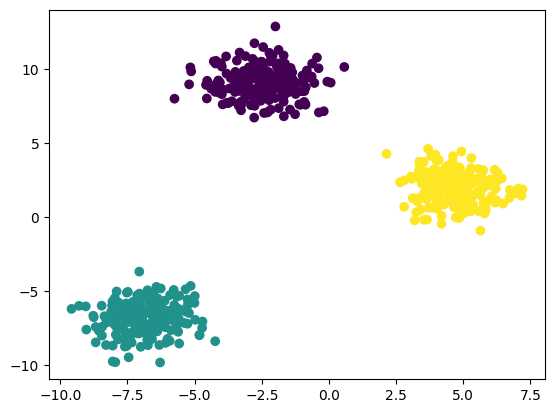

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_labels)

In [ ]:
y_test = kmeans.predict(X_test)

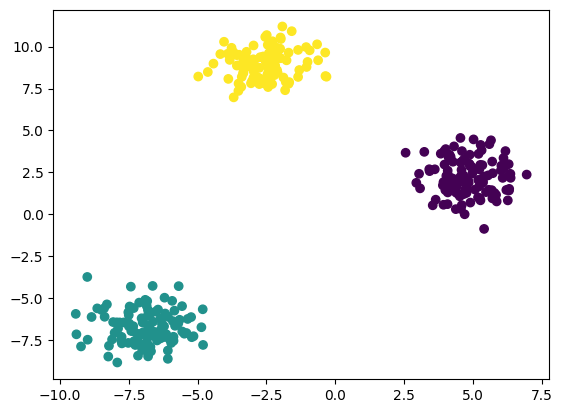

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

Knee locator

automating the process of finding k value

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl=KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kl.elbow

3

Performance metrics

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients=[]
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X_train)
  score=silhouette_score(X_train, kmeans.labels_)
  silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
silhouette_coefficients

[0.7024009416893275,
 0.8417121581954964,
 0.6670818395002549,
 0.5145356165194163,
 0.3372951217115196,
 0.3350823691092679,
 0.335821541753834,
 0.33628850271751926,
 0.33339881694057477]

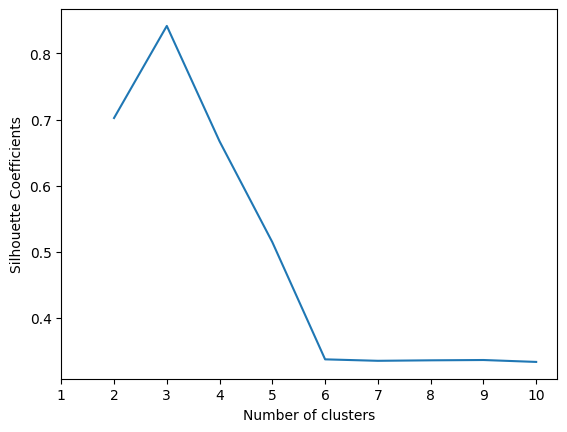

In [ ]:
## plot silhouette curve
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficients')
plt.show()